<a href="https://colab.research.google.com/github/guilhermelaviola/LautaroInterGoalsAnalysis/blob/main/LautaroInterGoals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [7]:
# Importing and displaying the last 10 goals scored:
df = pd.read_excel('lautaro-goals.xlsx')
df.tail(10)

,Competition,Round,Date,H/A,Against,Score,Position,Minute,Which goal,How was it scored,Assist
114,Serie A TIM,11,2023-11-04,A,Atalanta,1–2,CF,57,0–2,Right-footed shot,Henrikh Mkhitaryan
115,UEFA Champions League,Group Stage,2023-11-08,A,Red Bull Salzburg,0–1,CF,85,0–1,Penalty,NaN
116,Serie A TIM,13,2023-11-26,A,Juventus,1–1,CF,33,1–1,Right-footed shot,Marcus Thuram
117,Serie A TIM,15,2023-12-09,H,Udinese,4–0,CF,84,4–0,Right-footed shot,NaN
118,Serie A TIM,16,2023-12-17,A,Lazio,0–1,CF,40,0–1,Left-footed shot,NaN
119,Serie A TIM,19,2024-01-06,H,Hellas Verona,2–1,CF,13,1–0,Right-footed shot,Henrikh Mkhitaryan
120,Serie A TIM,20,2024-01-13,A,Monza,1–5,CF,14,0–2,Right-footed shot,Federico Dimarco
121,Serie A TIM,20,2024-01-13,A,Monza,1–5,CF,84,1–4,Penalty,NaN
122,Supercoppa Italiana,Final,2024-01-22,A,Napoli,0–1,CF,91,0–1,Right-footed shot,Benjamin Pavard
123,Serie A TIM,22,2024-01-28,A,Fiorentina,0–1,CF,14,0–1,Header,Kristjan Asllani


I extracted this data from Transfermarkt.

In [8]:
# Displaying the number of rows and columns in the dataset:
df.shape

(124, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Competition        124 non-null    object        
 1   Round              124 non-null    object        
 2   Date               124 non-null    datetime64[ns]
 3   H/A                124 non-null    object        
 4   Against            124 non-null    object        
 5   Score              124 non-null    object        
 6   Position           124 non-null    object        
 7   Minute             124 non-null    object        
 8   Which goal         124 non-null    object        
 9   How was it scored  124 non-null    object        
 10  Assist             91 non-null     object        
dtypes: datetime64[ns](1), object(10)
memory usage: 10.8+ KB


As you can see above, the dataset has 118 rows at moment (12/17/2023). Each row represents a goal Lautaro scored for Inter. And there are 11 columns:
1. Competition
2. Round
3. Date
4. H/A - Home or Away
5. Against
6. Final Score
7. Position
8. Minute
9. Which goal
10. How was it scored
11. Assist



In [11]:
# Renaming the table columns:
df.columns = ['Competition', 'Round', 'Date',
              'Home or away', 'Against who',
              'Score', 'Position', 'Minute',
              'Which goal', 'How was it scored',
              'Assist']

In [ ]:
# Displaying the dataset after the columns were renamed:
df.head()

,Competition,Round,Date,Home or away,Against who,Score H,Score A,Position,Minute,Which goal,How was it scored,Assist
0,Serie A TIM,7,2018-09-29,H,Cagliari,2,0,CF,12,1-0,Header,Dalbert
1,Serie A TIM,13,2018-11-24,H,Frosinone,3,0,CF,57,2-0,Header,Keita Baldé
2,Serie A TIM,18,2018-12-26,H,Napoli,1,0,CF,90+1,1-0,Left-footed shot,NaN
3,Coppa Italia,Round of 16,2019-01-13,H,Benevento,6,2,SS,48,4-0,Header,Ivan Perisic
4,Coppa Italia,Round of 16,2019-01-13,H,Benevento,6,2,SS,66,5-1,Right-footed shot,Ivan Perisic


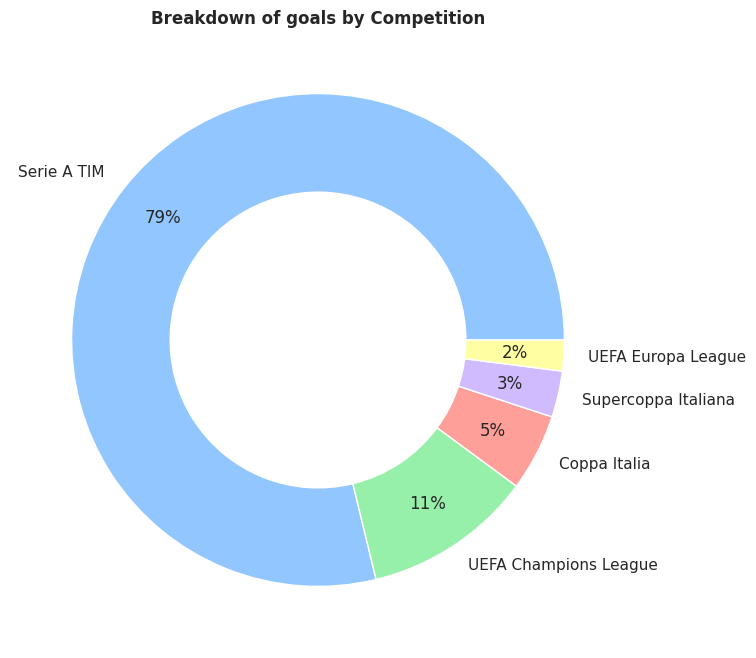

In [12]:
# Displaying goals scored by competition:
df.groupby('Date').first()['Competition'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by Competition', fontweight = 'bold')
plt.show()

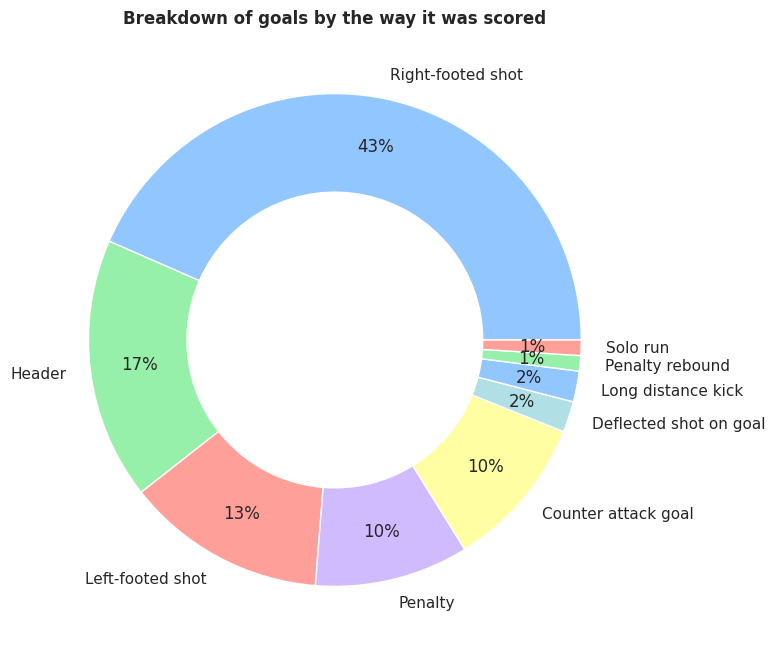

In [13]:
# Displaying goals scored by the way it was scored:
df.groupby('Date').first()['How was it scored'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by the way it was scored', fontweight = 'bold')
plt.show()

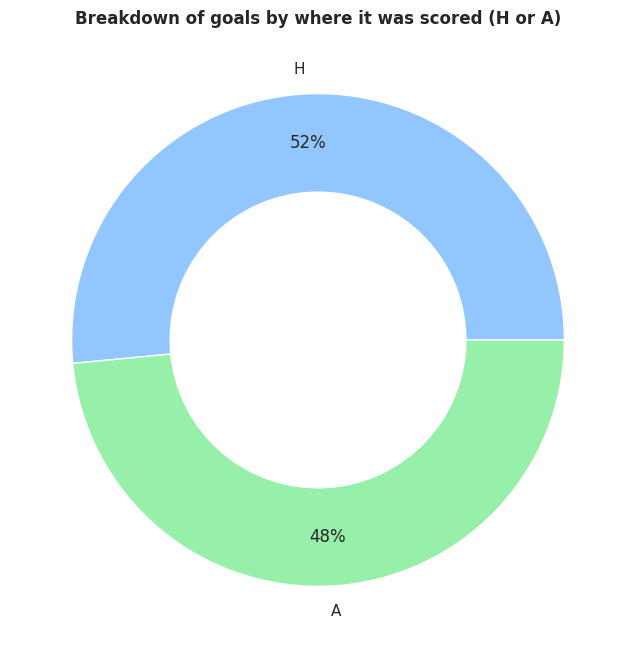

In [14]:
# Displaying goals scored by where it was scored (H or A):
df.groupby('Date').first()['Home or away'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by where it was scored (H or A)', fontweight = 'bold')
plt.show()

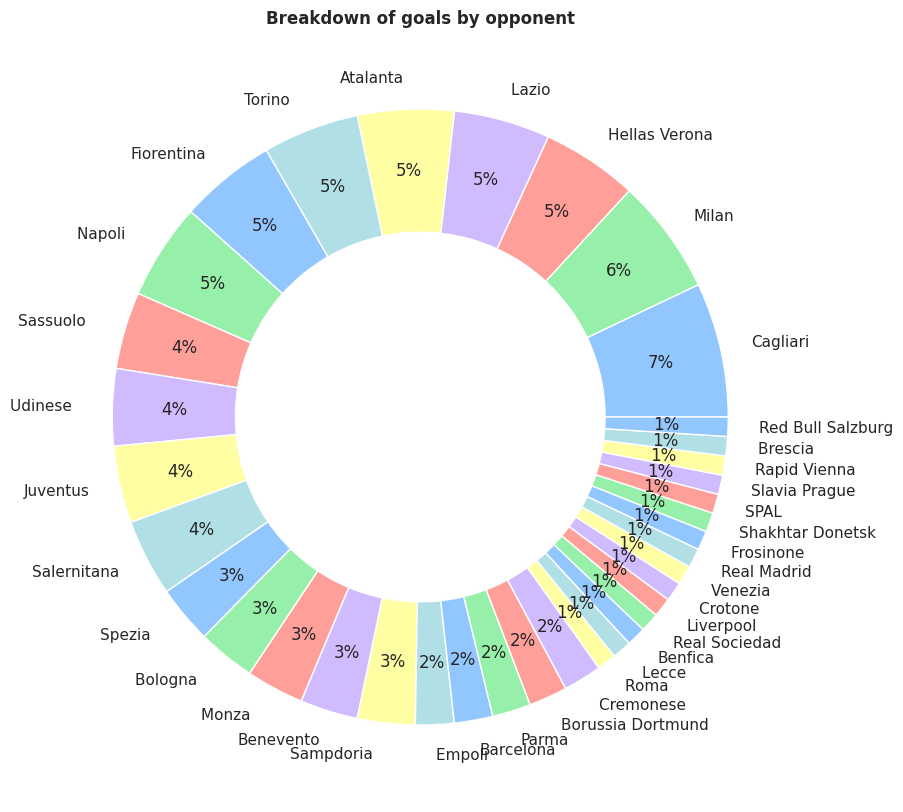

In [17]:
# Displaying goals scored by opponent:
df.groupby('Date').first()['Against who'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (10, 10),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by opponent', fontweight = 'bold')
plt.show()

In [18]:
df['Date'] = df['Date'].map(pd.to_datetime)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Year'] = df['Date'].apply(lambda x : x.year)

print(df.head())

    Competition        Round       Date Home or away  Against who Score  \
0   Serie A TIM            7 2018-09-29            H     Cagliari   2–0   
1   Serie A TIM           13 2018-11-24            H  Frosinone     3–0   
2   Serie A TIM           18 2018-12-26            H     Napoli     1–0   
3  Coppa Italia  Round of 16 2019-01-13            H    Benevento   6–2   
4  Coppa Italia  Round of 16 2019-01-13            H    Benevento   6–2   

  Position Minute Which goal  How was it scored        Assist  Day  Month  \
0       CF     12        1–0             Header       Dalbert   29      9   
1       CF     57        2–0             Header   Keita Baldé   24     11   
2       CF   90+1        1–0   Left-footed shot           NaN   26     12   
3       SS     48        4–0             Header  Ivan Perisic   13      1   
4       SS     66        5–1  Right-footed shot  Ivan Perisic   13      1   

   Year  
0  2018  
1  2018  
2  2018  
3  2019  
4  2019  


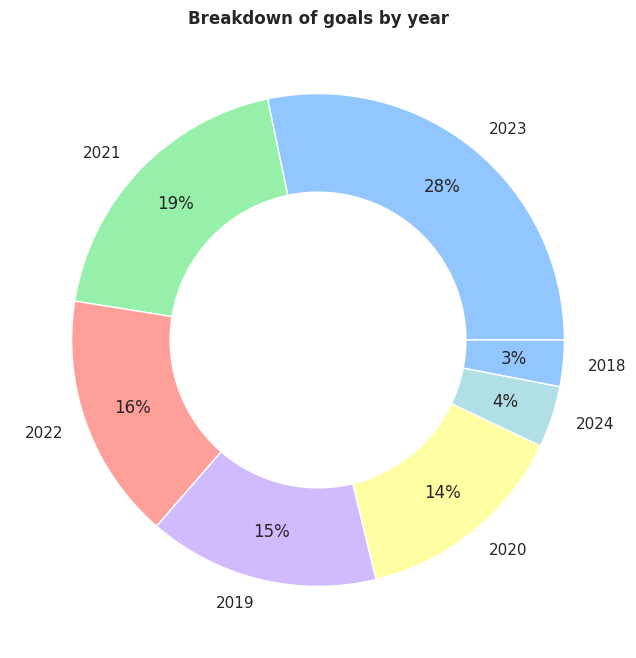

In [19]:
df.groupby('Date').first()['Year'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by year', fontweight = 'bold')
plt.show()

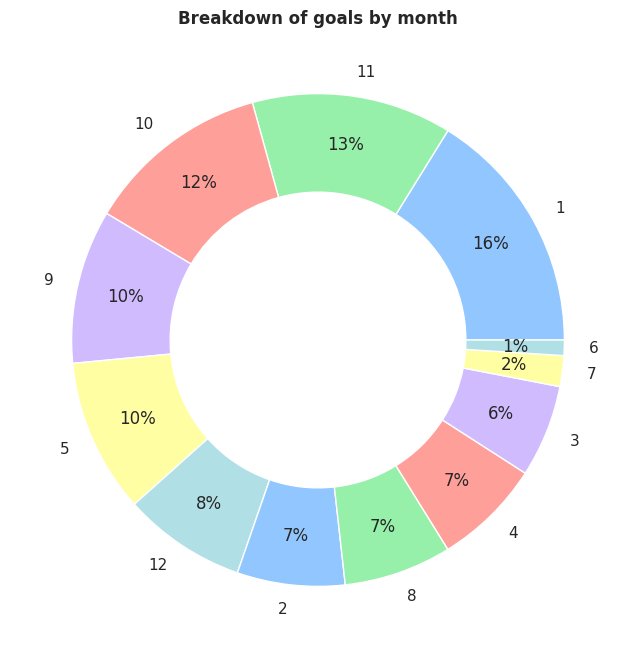

In [22]:
df.groupby('Date').first()['Month'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by month', fontweight = 'bold')
plt.show()

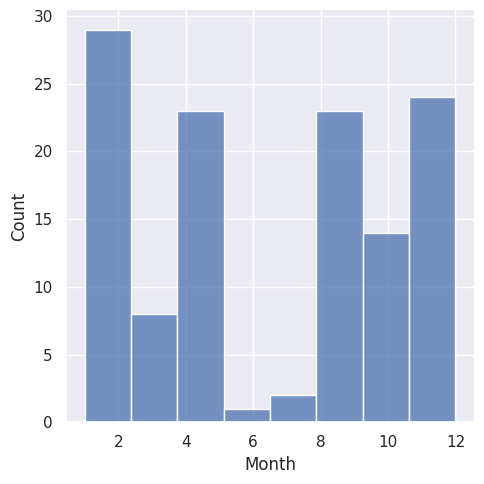

In [23]:
# Checking the goal performances by month:
sns.set(rc = {'figure.figsize' : (12, 10)})
sns.displot(df['Month'])

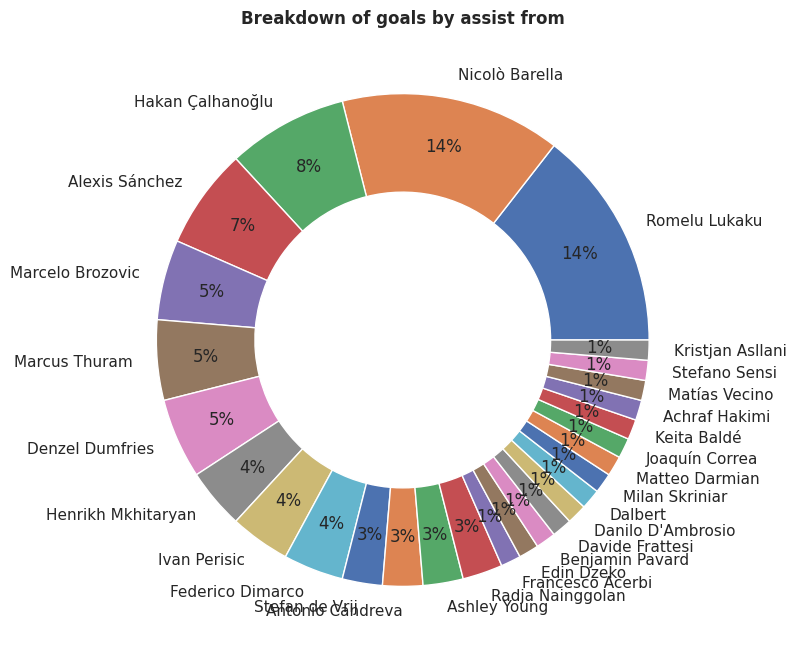

In [24]:
df.groupby('Date').first()['Assist'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by assist from', fontweight = 'bold')
plt.show()

<Axes: xlabel='Month', ylabel='Year'>

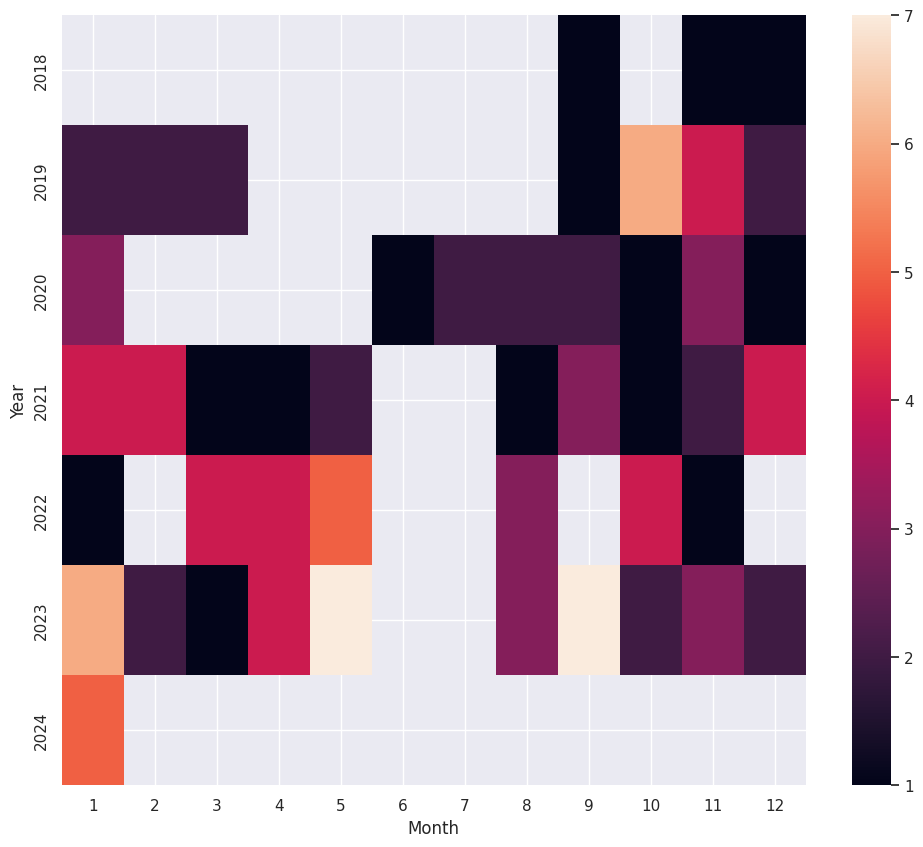

In [25]:
# Correlation of Year and Month with heatmap:
corr = df.groupby(['Year', 'Month']).apply(lambda x : len(x))
corr = corr.unstack()
sns.heatmap(corr, annot = False)

In [26]:
def scored_in_first_or_second_half(timing):
  if timing < 45:
    result = 'First half'
  elif timing > 45 and timing < 90:
    result = 'Second half'
  else:
    result = 'Extra time'
  return result

df['First or Second Half'] = df['Minute'].apply(scored_in_first_or_second_half)
df.head(10)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
def result_type(location, score_h, score_a):
  if location == 'H' and score_h > score_a:
    result = 'Home win'
  elif location == 'H' and score_h < score_a:
    result = 'Home defeat'
  elif location == 'H' and score_h == score_a:
    result = 'Home draw'
  elif location == 'A' and score_a > score_h:
    result = 'Away win'
  elif location == 'A' and score_a < score_h:
    result = 'Away defeat'
  else:
    result = 'Away draw'
  return result

df['Result type'] = df[['Home or away', 'Score H', 'Score A']].apply(result_type)
df.head(10)

TypeError: ignored

In [ ]:
# Testing the method
def result_type(score_h, score_a):
  if score_h > score_a:
    result = 'Home win'
  elif score_h < score_a:
    result = 'Home defeat'
  elif score_h == score_a:
    result = 'Home draw'
  elif score_a > score_h:
    result = 'Away win'
  elif score_a < score_h:
    result = 'Away defeat'
  elif score_a == score_h:
    result = 'Away draw'
  return result

df['Result type'] = df[['Score H', 'Score A']].apply(result_type)
df.head(10)

TypeError: ignored

In [ ]:
df.groupby('Minute').first()['First or Second Half'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by half', fontweight = 'bold')
plt.show()

KeyError: ignored

In [ ]:
# Adding Racing Bar animation for :
df.Date = pd.to_datetime(df.Date, format = '%Y')

In [ ]:
#Preparing a pivot table:
racing_bar_data = df.pivot_table(values = 'Against who', index = 'Date', columns = 'Competition')

<ipython-input-12-796136b4e6b4>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  racing_bar_data = df.pivot_table(values = 'Against who', index = 'Date', columns = 'Competition')


In [ ]:
# Checking if there are any null value in the pivot table:
racing_bar_data.columns[racing_bar_data.isnull().sum() == 0]

Index([], dtype='object', name='Competition')

In [ ]:
# Converting the data into a cumulative sum over several years:
racing_bar_filled = racing_bar_data.interpolate(method = 'linear').fillna(method = 'bfill')
racing_bar_filled = racing_bar_filled.cumsum()

In [ ]:
# Oversampling the dataset with interpolation (linear) for a smooth transition in the frames of the snimation:
racing_bar_filled = racing_bar_filled.resample('1D').interpolate(method = 'linear')[::7]

ValueError: ignored

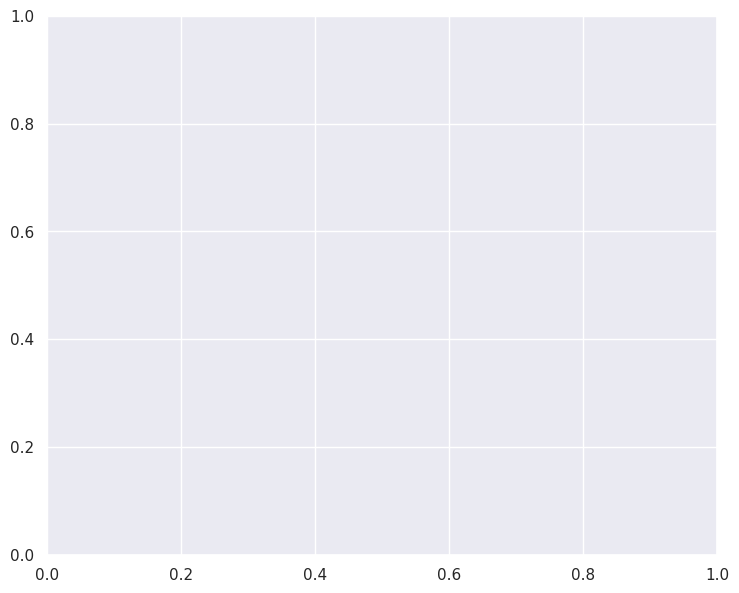

In [ ]:
# Creating and saving a Bar Chart Animation:
selected = racing_bar_filled.iloc[-1, :].sort_values(ascending = False)[:20].index
data = racing_bar_filled[selected].round()

fig, ax = plt.subplots(figsize = (9.3, 7))
fig.subplots_adjust(left = 0.18)

#Number of frames:
no_of_frames = data.shape[0]

# Initiating the barplot with the first rows of the dataframe:
bars = sns.barplot(y = data.columns, x = data.iloc[0, :], orient = 'h', ax = ax)
ax.set_xlim(0, 1500)
texts = [ax.text(0, i, 0, va = 'center') for i in range(data.shape[1])]
title_text = ax.text(650, -1, 'Date: ', fontsize = 12)
ax.set_xlabel(' ')
ax.set_ylabel(None)

def animate(i):
  y = data.iloc[i, :]

  # Updating the title of the barplot axis:
  title_text.set_text(f'Date: {str(data.index[i].date())}')

  # updating elements in both plots:
  for j, b, in enumerate(bars.patches):
    # updating each bar's height:
    b.set_width(y[j])

    # updating text for each bar (optional)
    texts[j].set_text(f'${y[j].astype(int)}M')
    texts[j].set_x(y[j])

animation = FuncAnimation(fig, animate, repeat = False,
                          frames = no_of_frames,
                          interval = 1, blit = False)
animation.save('goals.gif', writer = 'imagemagick', fps = 120)
plt.close(fig)